<a href="https://colab.research.google.com/github/SUBHASREE-24/ML-Projects/blob/main/Perfume_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

# Load the dataset for men's and women's perfumes
mens_perfume_df = pd.read_csv("/content/ebay_mens_perfume.csv")
womens_perfume_df = pd.read_csv("/content/ebay_womens_perfume.csv")

# Display basic information about the datasets
print("Men's Perfume Dataset Info:")
print(mens_perfume_df.info())

print("\nWomen's Perfume Dataset Info:")
print(womens_perfume_df.info())

Men's Perfume Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               997 non-null    object 
 3   price              1000 non-null   float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          889 non-null    float64
 6   availableText      997 non-null    object 
 7   sold               994 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.2+ KB
None

Women's Perfume Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  

In [27]:
# Check for missing values
print("Missing Values in Men's Perfume Dataset:")
print(mens_perfume_df.isnull().sum())

print("\nMissing Values in Women's Perfume Dataset:")
print(womens_perfume_df.isnull().sum())

# Summary statistics
print("\nSummary Statistics for Men's Perfume Dataset:")
print(mens_perfume_df.describe())

print("\nSummary Statistics for Women's Perfume Dataset:")
print(womens_perfume_df.describe())

Missing Values in Men's Perfume Dataset:
brand                  1
title                  0
type                   3
price                  0
priceWithCurrency      0
available            111
availableText          3
sold                   6
lastUpdated           53
itemLocation           0
dtype: int64

Missing Values in Women's Perfume Dataset:
brand                  1
title                  0
type                   2
price                  0
priceWithCurrency      0
available            131
availableText          8
sold                  16
lastUpdated           73
itemLocation           0
dtype: int64

Summary Statistics for Men's Perfume Dataset:
             price   available          sold
count  1000.000000  889.000000    994.000000
mean     46.481200   20.046119    766.266600
std      35.527862   61.547985   3200.971733
min       3.000000    2.000000      1.000000
25%      22.990000    5.000000     14.000000
50%      35.710000   10.000000     49.500000
75%      59.000000   10.000

In [28]:
# Market Analysis: Average price of perfumes by brand and type
avg_price_by_brand_men = mens_perfume_df.groupby('brand')['price'].mean()
avg_price_by_brand_women = womens_perfume_df.groupby('brand')['price'].mean()

avg_price_by_type_men = mens_perfume_df.groupby('type')['price'].mean()
avg_price_by_type_women = womens_perfume_df.groupby('type')['price'].mean()

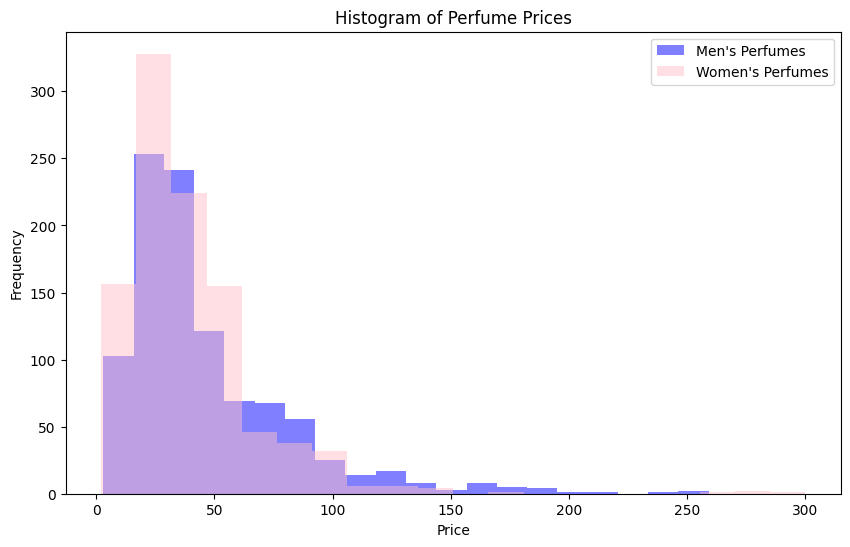

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(mens_perfume_df['price'], bins=20, alpha=0.5, label='Men\'s Perfumes', color='blue')
plt.hist(womens_perfume_df['price'], bins=20, alpha=0.5, label='Women\'s Perfumes', color='pink')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Perfume Prices')
plt.legend()
plt.show()

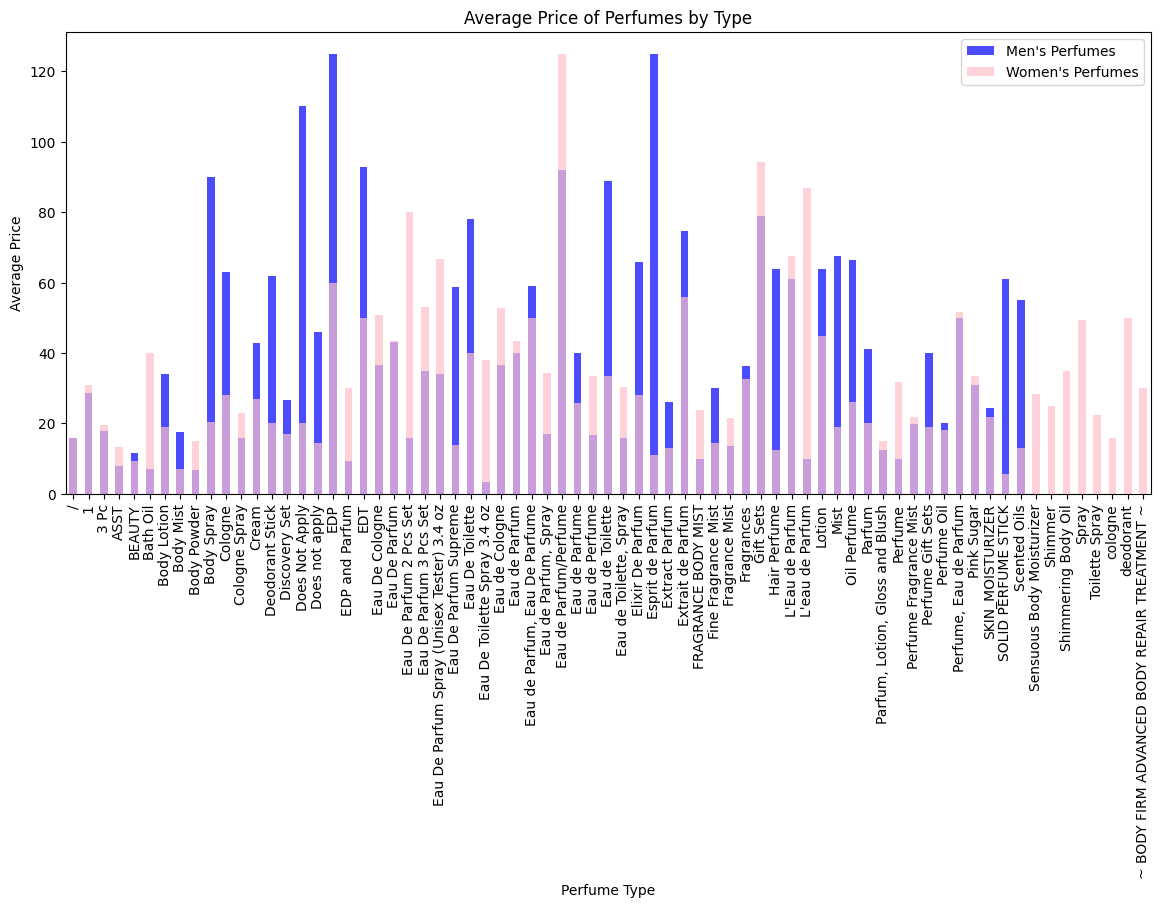

In [30]:
avg_price_by_type_men.plot(kind='bar', color='blue', alpha=0.7, label='Men\'s Perfumes', figsize=(14, 6))
avg_price_by_type_women.plot(kind='bar', color='pink', alpha=0.7, label='Women\'s Perfumes')

plt.xlabel('Perfume Type')
plt.ylabel('Average Price')
plt.title('Average Price of Perfumes by Type')
plt.legend()
plt.show()

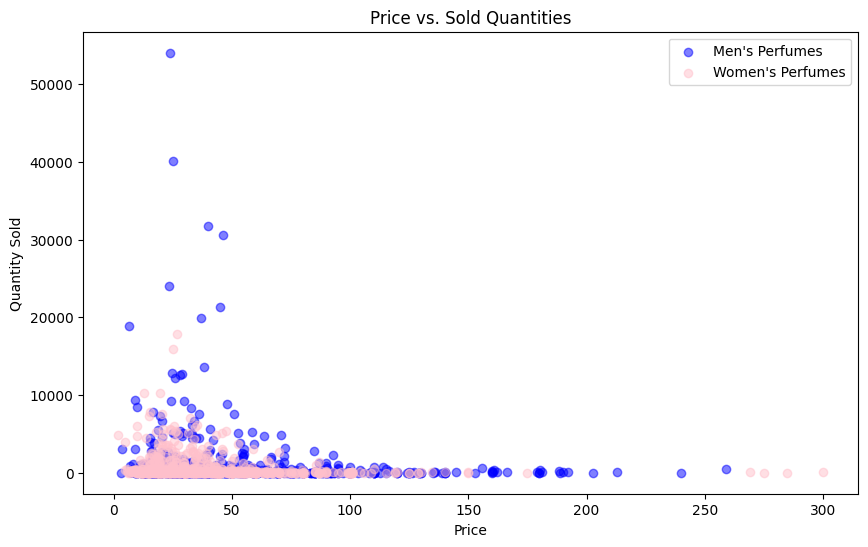

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(mens_perfume_df['price'], mens_perfume_df['sold'], label='Men\'s Perfumes', color='blue', alpha=0.5)
plt.scatter(womens_perfume_df['price'], womens_perfume_df['sold'], label='Women\'s Perfumes', color='pink', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.title('Price vs. Sold Quantities')
plt.legend()
plt.show()

<ipython-input-34-7e45d95d3023>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='itemLocation', data=filtered_data, order=top_10_locations, palette='viridis')


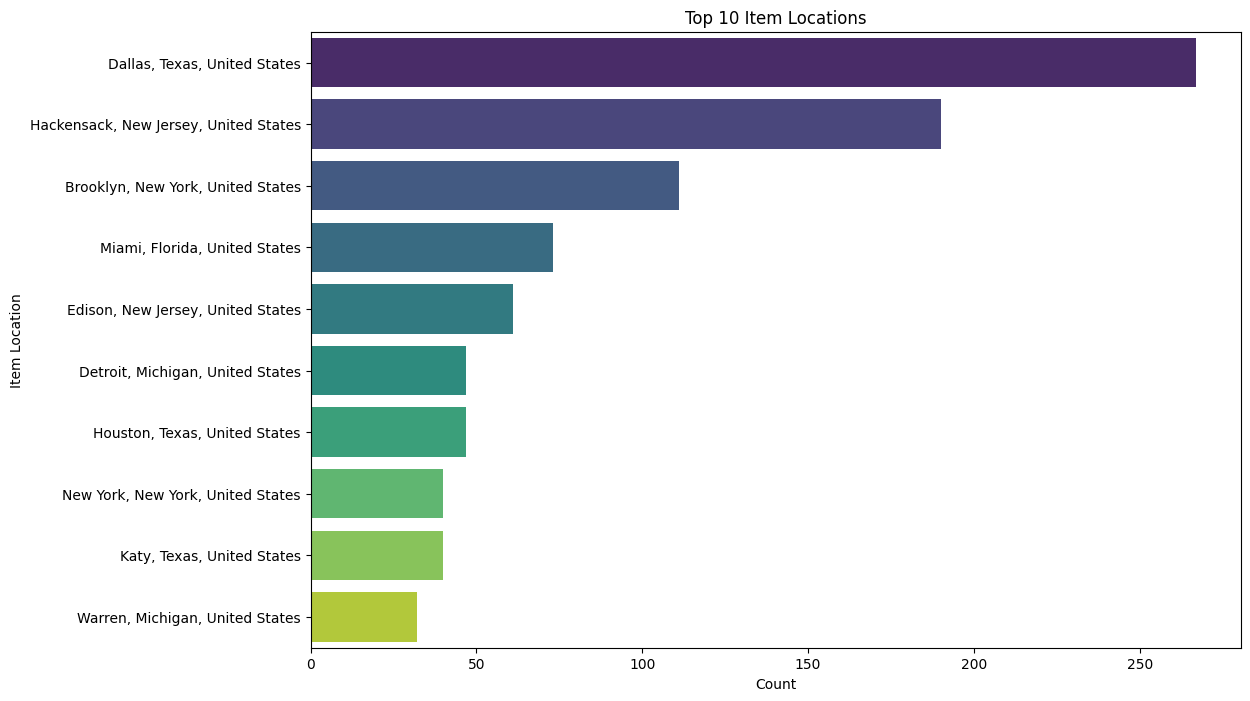

In [34]:
import seaborn as sns

plt.figure(figsize=(12, 8))
# Combine the 'itemLocation' columns and count occurrences
item_location_counts = pd.concat([mens_perfume_df['itemLocation'], womens_perfume_df['itemLocation']]).value_counts()

# Select the top 10 locations
top_10_locations = item_location_counts.index[:10]

# Filter the combined DataFrame for only the top 10 locations
filtered_data = pd.concat([mens_perfume_df, womens_perfume_df])[pd.concat([mens_perfume_df['itemLocation'], womens_perfume_df['itemLocation']]).isin(top_10_locations)]

# Create the countplot using the filtered data and the top 10 locations as the order
sns.countplot(y='itemLocation', data=filtered_data, order=top_10_locations, palette='viridis')
plt.title('Top 10 Item Locations')
plt.xlabel('Count')
plt.ylabel('Item Location')
plt.show()

            brand                                              title  \
0            Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1         AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2       Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3  Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4         Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   

              type   price priceWithCurrency  available  \
0    Eau de Parfum   84.99      US $84.99/ea       10.0   
1    Eau de Parfum  109.99        US $109.99        8.0   
2  Eau de Toilette  100.00        US $100.00       10.0   
3  Eau de Toilette   44.99      US $44.99/ea        2.0   
4       Fragrances   16.91         US $16.91        NaN   

                           availableText   sold                lastUpdated  \
0      More than 10 available / 116 sold  116.0  May 24, 2024 10:03:04 PDT   
1                  8 available / 48 sold   48.0  May 23,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


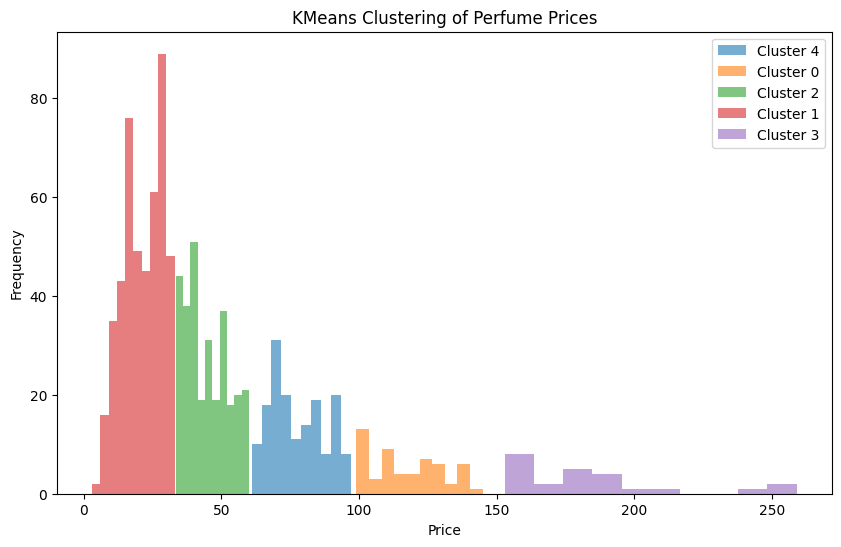

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Load the dataset from a local file (adjust the path as necessary)
file_path = "/content/ebay_mens_perfume.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to ensure it is loaded correctly
print(data.head())

#Selecting relevant features for clustering
# Exclude the 'brand' column and use only numerical features like 'price'
X = data[['price']]

#Applying KMeans algorithm
kmeans=  KMeans (n_clusters=5, random_state=42)
kmeans.fit(X)

#Predicting the clusters
data['Cluster'] = kmeans.labels_

# Plotting the clusters (adjust plotting as needed since you now have only one feature)
plt.figure(figsize=(10, 6))

# Example: Histogram of prices colored by cluster
for cluster in data['Cluster'].unique():
    plt.hist(data[data['Cluster'] == cluster]['price'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('KMeans Clustering of Perfume Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()